###############################################
EPOCH:  500
___________________________________________

Training for learning rate 0.1.
r2:  0.787356888895258
RMSE:  3065.985254879543
___________________________________________

Training for learning rate 0.05.
r2:  0.7826133527483765
RMSE:  3099.9938718074272
___________________________________________

Training for learning rate 0.01.
r2:  0.7806265173160525
RMSE:  3114.1280620261246
___________________________________________

Training for learning rate 0.001.
r2:  0.7811024248272718
RMSE:  3110.748342720454
###############################################
EPOCH:  1000
___________________________________________

Training for learning rate 0.1.
r2:  0.7809961160947594
RMSE:  3111.503626490641
___________________________________________

Training for learning rate 0.05.
r2:  0.7822736709225837
RMSE:  3102.4149049335574
___________________________________________

Training for learning rate 0.01.
r2:  0.7827642355246482
RMSE:  3098.91

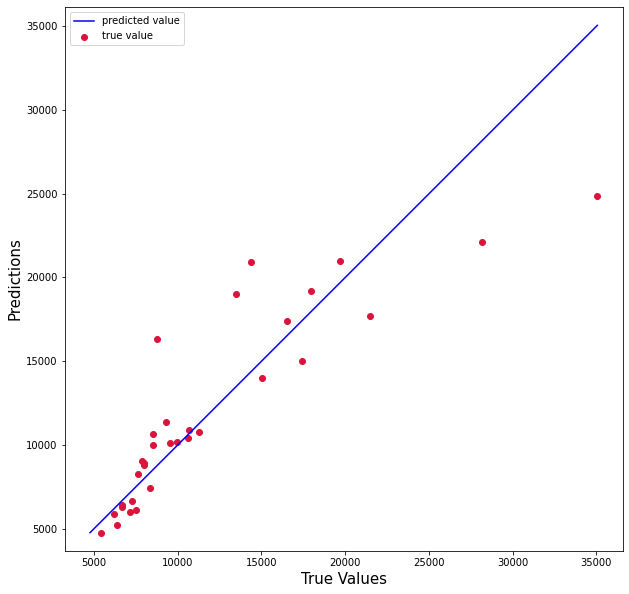

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

class Data:
  def __init__(self, loc):
    self.data = pd.read_csv(loc)
    header = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
    self.data.columns = header

  def getData(self):
    return self.data

  def processData(self, Data):

    Data.replace('?',np.nan, inplace=True)
    Data.dropna(inplace=True)

    Data['normalized-losses'] = Data['normalized-losses'].astype('int')
    Data['bore'] = Data['bore'].astype('float')
    Data['stroke'] = Data['stroke'].astype('float')
    Data['horsepower'] = Data['horsepower'].astype('float')
    Data['peak-rpm'] = Data['peak-rpm'].astype('int')
    Data['price'] = Data['price'].astype('int')
    Data = Data.select_dtypes(exclude=['object'])

    return Data

  def getFeaturesAndTarget(self, Data):  
    X = Data[["highway-mpg", "curb-weight", "horsepower", "engine-size"]]
    Y = Data[["price"]]
    Y = Y.values.ravel()
    s = StandardScaler()
    X = pd.DataFrame(s.fit(X).fit_transform(X))
    return (X, Y)

  def getDataSplit(self, X, Y):  
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    return (X_train, X_test, Y_train, Y_test)




class Model:
  model = SGDRegressor()
  def __init__(self, X, Y):
    self.model.fit(X,Y)

  def pred(self, X):  
    return self.model.predict(X);

  def rmseAndR2(self, expected, predicted):
    rmse = (np.sqrt(mean_squared_error(expected, predicted)))
    r2 = r2_score(expected, predicted)
    return (rmse,r2)




if __name__ == "__main__":
    alpha = [0.1, 0.05, 0.01, 0.001]
    alpha = [0.1, 0.05, 0.01, 0.001]
    epochs = [500, 1000, 2000, 4000, 8000, 10000, 20000]

    for epoch in epochs:
      print("###############################################")
      print("EPOCH: ", epoch)
      for a in alpha:
        print("___________________________________________\n")
        print("Training for learning rate {}.".format(a))
        data = Data('https://raw.githubusercontent.com/kunal4104/CS6375/master/imports-85.data') 
        df = data.getData();
        df = data.processData(df);
        X, Y = data.getFeaturesAndTarget(df)
        X_train, X_test, Y_train, Y_test = data.getDataSplit(X, Y);
        sgdLinear = Model(X_train, Y_train)
        Y_pred_test = sgdLinear.pred(X_test);
        rmse, r2 = sgdLinear.rmseAndR2(Y_test, Y_pred_test);
        print("r2: ", r2)
        print("RMSE: ", rmse)
    pl.figure(figsize=(10,10))
    pl.scatter(Y_test, Y_pred_test, c='crimson')
    p1 = max(max(Y_pred_test), max(Y_test))
    p2 = min(min(Y_pred_test), min(Y_test))
    pl.plot([p1, p2], [p1, p2], 'b-')
    pl.legend(["predicted value",  "true value"])
    pl.xlabel('True Values', fontsize=15)
    pl.ylabel('Predictions', fontsize=15)
    pl.axis('equal')   
    pl.show()
